In [1]:
import gym
import numpy as np

from numpy.random import random, choice
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

env = gym.make('FrozenLake8x8-v0')

# parameters 
#episodes = 10000
#gamma = 1.0
#alpha = 0.1
#epsilon = 1.0
epsilon_decay = 0.999 # decay per episode
eligibility_decay = 0.3

n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))
returns = []

In [2]:
# Parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (9, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

plt.rcParams.update(params)

In [3]:
from IPython.display import clear_output, display
from time import sleep

def fn_display(opt_policy):
    '''
    Function to visualise how agent behaves under given policy
    Args:
        opt_policy: one hot encoded policy, numpy array of shape (64,4)
    '''
    points = 0
    for i_episode in range(5): # run 10 episodes
        observation = env.reset()
        while True: # run until episode is done
            clear_output(wait=True)
            print ('Episode number:{} Score {}'.format(i_episode, points))
            env.render()
            sleep(0.1)
            action = np.argmax(opt_policy[observation])
            observation, reward, done, info = env.step(action)
            points += reward
            if done:
                break

In [4]:
def epsilon_greedy_action(state, Q, epsilon):
    '''
    This function return an action to be taken based on epsilon greedy approach.
    If epsilon value is more than any random number between  0 and 1 then random action is returned
    else best possible action is returned
    '''

    values = Q[state,:] 
    max_value = max(values)
    no_actions = len(values)

    greedy_actions = [a for a in range(no_actions) if values[a] == max_value]
    
    explore = (random() < epsilon)
  
    if explore:
        return np.random.choice([0,1,2,3])
    else:
        return np.random.choice([a for a in greedy_actions])

In [5]:
def grid_search(env, alpha_list, epsilon_list, gamma_list, episodes=1000):
    
    '''
    This function takes lists of parameters to be tuned. b 
    '''
    
    score_measure = {}
    
    for alpha in alpha_list:
        for epsilon in epsilon_list:
            for gamma in gamma_list:
                
                params = (alpha,epsilon,gamma)
                score_measure[params] = 0
                
                Q = np.zeros((n_states, n_actions))
                new_epsilon = epsilon
                
                for episode in range(episodes):
                    
                    state = env.reset()
                    new_epsilon *= epsilon_decay # epsilon decays for each state

                    while True:
            
                        action = epsilon_greedy_action(state, Q, new_epsilon)
                        new_state, reward, done, info = env.step(action)
                    
                        score_measure[params] = score_measure[params] + reward
                        
                        delta = reward + gamma * max(Q[new_state,:]) - Q[state, action]
                        Q[state, action] = Q[state, action] + alpha * delta 

                        state= new_state

                        if done:
                            break    
                            
    best_params = max(score_measure, key=score_measure.get) 
    best_score = score_measure[best_params]
    return best_params,best_score           

In [6]:
alpha_list = [0.2,0.3,0.4,0.5,0.6]
epsilon_list = [0.2,0.3,0.5,0.6]
gamma_list = [0.9,0.95]
 
best_params,best_score = grid_search(env,alpha_list,epsilon_list,gamma_list)
alpha,epsilon,gamma = best_params

In [7]:
print(f'best alpha: {alpha}\nbest epsilon: {epsilon}\nbest gamma: {gamma}')

best alpha: 0.2
best epsilon: 0.5
best gamma: 0.95


In [8]:
def QLearning(env, episodes, alpha, epsilon, gamma, epsilon_decay):
    
    Q = np.zeros((n_states, n_actions))
    
    for episode in range(episodes):

        state = env.reset()
        epsilon *= epsilon_decay # epsilon decays for each state

        while True:
            
            action = epsilon_greedy_action(state, Q, epsilon)
            new_state, reward, done, info = env.step(action)
        
            delta = reward + gamma * max(Q[new_state,:]) - Q[state, action]
            Q[state, action] = Q[state, action] + alpha * delta 

            state= new_state

            if done:
                break
    return Q

In [9]:
final_Q = QLearning(env, 100000, alpha, epsilon, gamma, epsilon_decay)

In [10]:
V = [max(i) for i in final_Q]

In [11]:
values = np.array(V).reshape(8,8) 

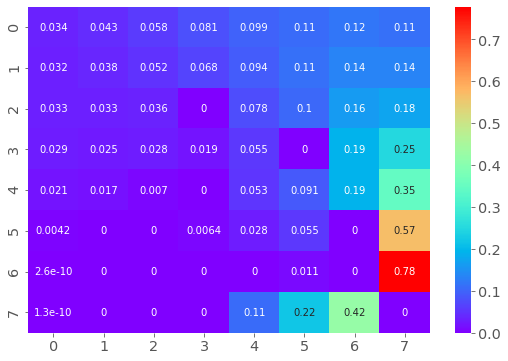

In [12]:
import seaborn as sns

sns.heatmap(values,annot=values,cmap='rainbow')

In [13]:
def get_policy(env, V):
    
    policy = np.zeros((n_states,n_actions))
    for state in range(env.nS):
        action_values = np.zeros(env.nA)
        for action in range(env.nA):
            for prob,next_state,reward,terminated in env.P[state][action]:
                action_values[action] += prob * (reward + gamma * V[next_state])
        
        best_action = np.argmax(action_values) 
        policy[state][best_action] = 1
    return policy

In [14]:
policy = get_policy(env,V)

In [15]:
n_iteration = 10
highscore = 0
data_row = []
for n_iter in range(n_iteration):

    points = 0 # keep track of the reward each episode
    data_dict = {}
    for i_episode in range(5): # run 20 episodes
        print ('_'*50)
        observation = env.reset()
        while True: # run until episode is done
            #grid.render()
            action = np.argmax(policy[observation])
            observation, reward, done, info = env.step(action)
            points += reward
            if done:
                env.render()
                #print (observation, reward, done, info)

                if points > highscore: # record high score
                    highscore = points
                break
    data_dict['run'] = n_iter
    data_dict['Points']=  points
    data_row.append(data_dict)

__________________________________________________
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
__________________________________________________
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
__________________________________________________
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
__________________________________________________
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
__________________________________________________
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
__________________________________________________
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
__________________________________________________
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
__________________________________________________
  (Right)
SFFFFFFF
F

In [16]:
fn_display(policy)

Episode number:4 Score 3.0
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
